## data generation

In [1]:
from locally_connected import LocallyConnected
from lbfgsb_scipy import LBFGSBScipy
from trace_expm import trace_expm
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import numpy as np
import scipy.sparse
import GraphNOTEARS
import notears_torch_version
import lasso
import dynotears
import utils as ut
import matplotlib.pyplot as plt



#device = torch.device("cuda:0")
device = torch.device("cuda")

def data_pre(n, d, s0, w_graph_type, p_graph_type, sem_type):

    w_true = ut.simulate_dag(d, s0, w_graph_type)#binary W

    w_mat = ut.simulate_parameter(w_true)#weighted W


    adj1 = ut.generate_adj(n) #A

    num_step = 2 #cannot work if num_step=1
    Xbase = []

    #Xbase1 = ut.simulate_linear_sem(w_mat, n, sem_type, noise_scale=0.5)#X_0
    p1_mat=w_mat
    p1_true=w_true
    #p1_mat, p1_true = ut.generate_tri(d, p_graph_type, low_value=0.0, high_value=2)#P
 

    for i in range(num_step):
        #Xbase1 = ut.simulate_linear_sem_with_P(w_mat, p1_mat, adj1@Xbase1, n, sem_type, noise_scale=1)#X_1,X_2...
        ##no time-dependency
        Xbase1 = ut.simulate_linear_sem(w_mat, n, sem_type, noise_scale=0.5)#X_0
        Xbase.append(Xbase1)

    return Xbase, adj1, w_true,w_mat, p1_true, p1_mat

D:\Anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
torch.set_default_dtype(torch.double)
np.set_printoptions(precision=3)

import utils as ut
ut.set_random_seed(12345)

n = 50

d = 20

w_graph_type = 'ER'
p_graph_type = 'ER' 
sem_type = 'exp'
s0 =  d

In [3]:
Xlags, adj1, w_true,w_mat, p1_true, p1_mat = data_pre(n, d, s0, w_graph_type,p_graph_type, sem_type)

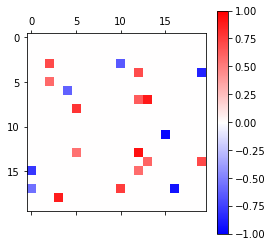

In [4]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

In [5]:
##node 12,13 is spurious
w_mat[12,:]=0
w_mat[13,:]=0

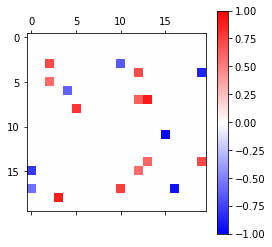

In [6]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

In [7]:
np.shape(Xlags)

(2, 50, 20)

In [8]:
adj1.shape

(50, 50)

## testing data

In [9]:
w_test_mat=w_mat.copy()
w_test_mat[4,12]=-1.0
w_test_mat[14,13]=-1.0

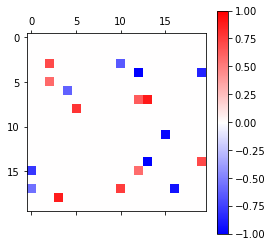

In [10]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_test_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

In [11]:
def data_pre_test(n, w_mat,sem_type):
    Xbase = []
    num_step = 2
    for i in range(num_step):
        Xbase1 = ut.simulate_linear_sem(w_mat, n, sem_type, noise_scale=0.5)#X_0
        Xbase.append(Xbase1)

    return Xbase

In [12]:
Xlags_test= data_pre_test(n,w_test_mat, sem_type)

## fit the causal graph

In [13]:
Xlags_torch = torch.Tensor(np.array(Xlags))
adj1_torch = torch.Tensor(adj1)
model_1 = GraphNOTEARS.model_p1_MLP(dims=[d, n, 1], bias=True)
#model_1.to(device)
W_est_1, P1_est_1 = GraphNOTEARS.linear_model(model_1, Xlags_torch, adj1_torch,  lambda1 = 0.01, lambda2 = 0.01, lambda3 = 0.01)

rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rh

h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho

h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.

rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(

rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(

h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.

h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.0 1e+16
h tensor(0.0302)
rho < rho_max: 1.

h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.

rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_m

h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.0302)
rho < rho_max: 10.0 1e+16
h tensor(0.

rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_m

h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.0065)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 

rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h ten

h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 

rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h ten

rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 100.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0

h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0

h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0

h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0

h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0.0065)
rho < rho_max: 1000.0 1e+16
h tensor(0

rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 1000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)

h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10

h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10

h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10

h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10000.0 1e+16
h tensor(0.0005)
rho < rho_max: 10

rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)


h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 10000.0 1e+16


h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_

h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_max: 100000.0 1e+16
h tensor(9.3572e-05)
rho < rho_

h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 100000.0 1e+16
h tensor(2.2440e-05)
rho < rho_

h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(2.2

h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0

h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0

h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0

h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(2.2440e-05)
rho < rho_max: 10000000.0

h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 10000000.0

h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < r

h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < r

rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1

h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < r

rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1

h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(1.4357e-06)
rho < r

h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < rho_max: 100000000.0 1e+16
h tensor(2.0519e-07)
rho < r

h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.0 1e+16
h tensor(4.7522e-08)
rho < rho_max: 10000000000.

rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 100000000000.0 1

rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max:

h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.1757e-08)
rho < rho_max: 1000000000000.0 1e+16
h tensor(1.175

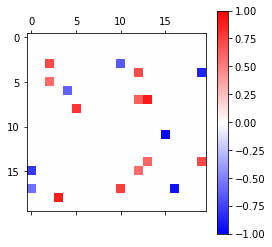

In [14]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

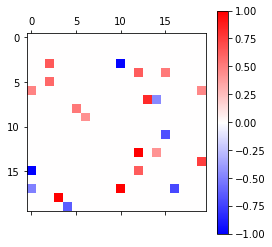

In [15]:
##Estimated W with the threshold
import matplotlib.pyplot as plt
plt.matshow((abs(W_est_1) > 0.4) * W_est_1,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

## process data to gnn format

In [16]:
import networkx as nx
import dgl

Using backend: pytorch


In [17]:
def get_node_feature(Xlags,node_num):
    for num_lags in range(1):
        if num_lags==0:
            X_feature=Xlags[num_lags][node_num]
        else:
            X_feature=np.append(X_feature,Xlags[num_lags][node_num])##shape num_lags*5 (250)
    return(X_feature)

In [18]:
def get_node_feature_sub(Xlags,node_num):
    for num_lags in range(1):
        if num_lags==0:
            X_feature=Xlags[num_lags][node_num][[1,2,3,4]]
        else:
            X_feature=np.append(X_feature,Xlags[num_lags][node_num][[1,2,3,4]])##shape num_lags*5 (250)
    return(X_feature)

In [19]:
def to_binary(x):
    if x>0.5:
        return 1
    else:
        return 0

In [20]:
G = nx.from_numpy_array(adj1)

In [21]:
n

50

In [22]:
import random

ut.set_random_seed(123)
torch.manual_seed(123)
valid_list=random.sample(range(50), 20) ##node list for validation
labels=[]
G = nx.from_numpy_array(adj1)
for node_num in range(n):
    G.nodes[node_num]['feature']=get_node_feature(Xlags,node_num)[:-1]
    
    G.nodes[node_num]['label']=to_binary(get_node_feature(Xlags,node_num)[-1])
    
    labels.append(G.nodes[node_num]['label'])
    if node_num in valid_list:
        G.nodes[node_num]['train_mask']=False
        G.nodes[node_num]['valid_mask']=True
    else:
        G.nodes[node_num]['train_mask']=True
        G.nodes[node_num]['valid_mask']=False

In [23]:
g = dgl.from_networkx(G, node_attrs=['feature','label','train_mask','valid_mask'])

D:\Anaconda\lib\site-packages\dgl\backend\pytorch\tensor.py:40: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)



In [24]:
g

Graph(num_nodes=50, num_edges=290,
      ndata_schemes={'feature': Scheme(shape=(19,), dtype=torch.float64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'valid_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [25]:
G_test = nx.from_numpy_array(adj1)
import random
ut.set_random_seed(123)
torch.manual_seed(123)
valid_list=random.sample(range(50), 20) ##node list for validation
labels=[]
G_test = nx.from_numpy_array(adj1)
for node_num in range(n):
    G_test.nodes[node_num]['feature']=get_node_feature(Xlags_test,node_num)[:-1]
    
    G_test.nodes[node_num]['label']=to_binary(get_node_feature(Xlags_test,node_num)[-1])
    
    labels.append(G_test.nodes[node_num]['label'])
    if node_num in valid_list:
        G_test.nodes[node_num]['train_mask']=False
        G_test.nodes[node_num]['valid_mask']=True
    else:
        G_test.nodes[node_num]['train_mask']=True
        G_test.nodes[node_num]['valid_mask']=False
g_test = dgl.from_networkx(G_test, node_attrs=['feature','label','train_mask','valid_mask'])
g_test

Graph(num_nodes=50, num_edges=290,
      ndata_schemes={'feature': Scheme(shape=(19,), dtype=torch.float64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'valid_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

## GCN

In [26]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

In [27]:
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, feature):
        # Creating a local scope so that all the stored ndata and edata
        # (such as the `'h'` ndata below) are automatically popped out
        # when the scope exits.
        with g.local_scope():
            g.ndata['h'] = feature
            g.update_all(gcn_msg, gcn_reduce)
            h = g.ndata['h']
            return self.linear(h)

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = GCNLayer(19, 8)
        self.layer2 = GCNLayer(8, 2)

    def forward(self, g, features):
        x = F.relu(self.layer1(g, features))
        x = self.layer2(g, x)
        return x


In [29]:
def evaluate(model, g, features, labels, mask):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [30]:
import torch.nn.functional as F
import dgl
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
import random
ut.set_random_seed(12345)
torch.manual_seed(12345)
gcn_msg = fn.copy_u(u="h", out="m")
gcn_reduce = fn.sum(msg="m", out="h")

net = Net()
print(net)

features = g.ndata['feature']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
valid_mask = g.ndata['valid_mask']
###test
features_test = g_test.ndata['feature']
labels_test = g_test.ndata['label']
###metric
train_acc_list=[]
valid_acc_list=[]
test_acc_list=[]
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
early_stop_thresh = 50
best_loss = 99998
best_epoch = -1
for epoch in range(500):
    net.train()
    logits = net(g, features)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[train_mask], labels[train_mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ##evaluate
    net.eval()
    train_acc = evaluate(net, g, features, labels, train_mask)
    valid_acc = evaluate(net, g, features, labels, valid_mask)
    test_acc = evaluate(net, g_test, features_test, labels_test, valid_mask)
    valid_loss = F.nll_loss(logp[valid_mask], labels[valid_mask])

    ##save the value
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
    test_acc_list.append(test_acc)
    print(
        "Epoch {:05d} | Loss {:.4f}|Valid Loss {:.4f}| Train Acc {:.4f} | Valid Acc {:.4f} | Test Acc {:.4f}".format(
            epoch, loss.item(),valid_loss.item(), train_acc,valid_acc, test_acc
        )
    )
     # early stop if valid not inprove after 5 epoch
        
    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch = epoch
        torch.save(net.state_dict(), "GCN_demo_large.pth")
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop
    

Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=19, out_features=8, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=8, out_features=2, bias=True)
  )
)
Epoch 00000 | Loss 0.8580|Valid Loss 0.9953| Train Acc 0.6333 | Valid Acc 0.6500 | Test Acc 0.6000
Epoch 00001 | Loss 2.8676|Valid Loss 2.4047| Train Acc 0.6333 | Valid Acc 0.7000 | Test Acc 0.6000
Epoch 00002 | Loss 0.7848|Valid Loss 0.7863| Train Acc 0.3667 | Valid Acc 0.3500 | Test Acc 0.6000
Epoch 00003 | Loss 3.5893|Valid Loss 2.9004| Train Acc 0.3667 | Valid Acc 0.4000 | Test Acc 0.6500
Epoch 00004 | Loss 2.5297|Valid Loss 2.0845| Train Acc 0.5333 | Valid Acc 0.5500 | Test Acc 0.6000
Epoch 00005 | Loss 0.7272|Valid Loss 0.7702| Train Acc 0.6333 | Valid Acc 0.6500 | Test Acc 0.6000
Epoch 00006 | Loss 1.3888|Valid Loss 1.2105| Train Acc 0.6333 | Valid Acc 0.6500 | Test Acc 0.6000
Epoch 00007 | Loss 1.9407|Valid Loss 1.6661| Train Acc 0.6333 | Valid Acc 0.6500 | Test Acc 0.6000
Epoch 00008 | Loss 1.8

Epoch 00094 | Loss 0.5110|Valid Loss 0.5323| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00095 | Loss 0.5107|Valid Loss 0.5325| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00096 | Loss 0.5101|Valid Loss 0.5313| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00097 | Loss 0.5095|Valid Loss 0.5293| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00098 | Loss 0.5092|Valid Loss 0.5276| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00099 | Loss 0.5087|Valid Loss 0.5269| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00100 | Loss 0.5082|Valid Loss 0.5272| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00101 | Loss 0.5077|Valid Loss 0.5281| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00102 | Loss 0.5073|Valid Loss 0.5286| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00103 | Loss 0.5068|Valid Loss 0.5281| Train Acc 0.7333 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 0010

Epoch 00189 | Loss 0.4718|Valid Loss 0.5023| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00190 | Loss 0.4714|Valid Loss 0.5022| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00191 | Loss 0.4711|Valid Loss 0.5022| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00192 | Loss 0.4707|Valid Loss 0.5021| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00193 | Loss 0.4703|Valid Loss 0.5021| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00194 | Loss 0.4700|Valid Loss 0.5021| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00195 | Loss 0.4696|Valid Loss 0.5020| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00196 | Loss 0.4692|Valid Loss 0.5020| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00197 | Loss 0.4688|Valid Loss 0.5020| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00198 | Loss 0.4685|Valid Loss 0.5020| Train Acc 0.8333 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 0019

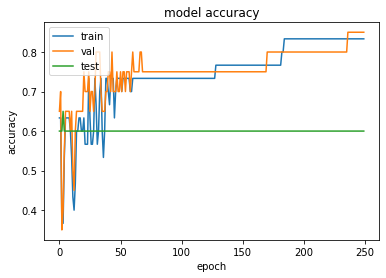

In [31]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(train_acc_list)
plt.plot(valid_acc_list)
plt.plot(test_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','test'], loc='upper left')
plt.show()

## attention_GCN

In [32]:
class atten_Net(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats,n_node):
        super(atten_Net, self).__init__()
        self.layer1 = GCNLayer(in_feats, hid_feats)
        self.layer2 = GCNLayer(hid_feats, out_feats)
        self.att_mlp_1 = nn.Linear(n_node, hid_feats)
        self.att_mlp_2 = nn.Linear(hid_feats, 2)

    def forward(self, g, features,dag):
        ##use mlp to get attention weights
        node_att = F.relu(self.att_mlp_1(dag))
        node_att = F.softmax(self.att_mlp_2(node_att), dim=-1)
        node_weight_c = node_att[:, 0]
        node_weight_o = node_att[:, 1]
        ##attention on the causal/trival part
        feature_c = node_weight_c.view(1, -1) * features
        feature_o = node_weight_o.view(1, -1) * features
        ## apply the mask on the features
        xc = F.relu(self.layer1(g, feature_c))
        xc = self.layer2(g, xc)
        xc=F.log_softmax(xc, 1)
        
        xo = F.relu(self.layer1(g, feature_o))
        xo = self.layer2(g, xo)
        xo=F.log_softmax(xo, 1)
        
        return xc,xo

In [33]:
def evaluate_new(model, g, features, labels, mask,dag):
    model.eval()
    with th.no_grad():
        logits_c,logits_o = model(g, features,dag)
        logits = logits_o[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [34]:
import random

ut.set_random_seed(12345)
torch.manual_seed(12345)
gcn_msg = fn.copy_u(u="h", out="m")
gcn_reduce = fn.sum(msg="m", out="h")
model = atten_Net(in_feats=19, hid_feats=8, out_feats=2,n_node=20)
print(model)
##
features = g.ndata['feature']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
valid_mask = g.ndata['valid_mask']
###metric
train_acc_list=[]
valid_acc_list=[]
test_acc_list=[]
###test
features_test = g_test.ndata['feature']
labels_test = g_test.ndata['label']
#params
early_stop_thresh = 50
best_loss = 99998
best_epoch = -1
alpha=0.3
beta=0.4

optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
for epoch in range(500):
    model.train()
    xc_logits,xo_logits = model(g, features,torch.tensor(W_est_1[:-1,:]))
    ##trivial part
    uniform_target = torch.ones_like(xc_logits[train_mask], dtype=torch.float)/2
    c_loss = F.kl_div(xc_logits[train_mask], uniform_target, reduction='batchmean')
    
    o_loss = F.nll_loss(xo_logits[train_mask], labels[train_mask])
    loss = alpha * c_loss + beta * o_loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #scheduler.step()
    ##evaluate
    model.eval()
    train_acc = evaluate_new(model, g, features, labels, train_mask,torch.tensor(W_est_1[:-1,:]))
    valid_acc = evaluate_new(model, g, features, labels, valid_mask,torch.tensor(W_est_1[:-1,:]))
    test_acc = evaluate_new(model, g_test, features_test, labels_test, valid_mask,torch.tensor(W_est_1[:-1,:]))
    #valid loss
    uniform_target = torch.ones_like(xc_logits[valid_mask], dtype=torch.float)/2
    c_loss = F.kl_div(xc_logits[valid_mask], uniform_target, reduction='batchmean')
    valid_loss = alpha * c_loss+beta *F.nll_loss(xo_logits[valid_mask], labels[valid_mask])
    #test loss
    test_xc_logits,test_xo_logits = model(g_test, features_test,torch.tensor(W_est_1[:-1,:]))
    uniform_target = torch.ones_like(test_xo_logits[valid_mask], dtype=torch.float)/2
    test_c_loss = F.kl_div(test_xc_logits[valid_mask], uniform_target, reduction='batchmean')
    test_o_loss = F.nll_loss(test_xo_logits[valid_mask], labels_test[valid_mask])
    test_loss = alpha * test_c_loss + beta * test_o_loss


    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
    test_acc_list.append(test_acc)

    print(
        "Epoch {:05d} | Loss {:.4f}|Test Loss {:.4f}| Train Acc {:.4f} | Valid Acc {:.4f} | Test Acc {:.4f}".format(
            epoch, loss.item(),test_loss.item(), train_acc,valid_acc, test_acc
        )
    )
    # early stop if valid not inprove after 5 epoch
        
    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch = epoch
        torch.save(model.state_dict(), "attention_demo_large.pth")
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop

atten_Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=19, out_features=8, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=8, out_features=2, bias=True)
  )
  (att_mlp_1): Linear(in_features=20, out_features=8, bias=True)
  (att_mlp_2): Linear(in_features=8, out_features=2, bias=True)
)
Epoch 00000 | Loss 0.3279|Test Loss 0.4713| Train Acc 0.5000 | Valid Acc 0.5000 | Test Acc 0.6000
Epoch 00001 | Loss 0.3626|Test Loss 0.5252| Train Acc 0.6000 | Valid Acc 0.6000 | Test Acc 0.6000
Epoch 00002 | Loss 0.3167|Test Loss 0.6149| Train Acc 0.6000 | Valid Acc 0.6500 | Test Acc 0.6000
Epoch 00003 | Loss 0.3021|Test Loss 0.6661| Train Acc 0.6000 | Valid Acc 0.5500 | Test Acc 0.6000
Epoch 00004 | Loss 0.3207|Test Loss 0.6542| Train Acc 0.6000 | Valid Acc 0.5500 | Test Acc 0.6000
Epoch 00005 | Loss 0.3128|Test Loss 0.6075| Train Acc 0.6333 | Valid Acc 0.6000 | Test Acc 0.6000
Epoch 00006 | Loss 0.2913|Test Loss 0.5541| Train Acc 0.6667 | Valid Acc 0.7000 | Test Acc 

Epoch 00083 | Loss 0.1882|Test Loss 0.5686| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00084 | Loss 0.1871|Test Loss 0.5617| Train Acc 0.7667 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00085 | Loss 0.1860|Test Loss 0.5607| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00086 | Loss 0.1848|Test Loss 0.5666| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00087 | Loss 0.1836|Test Loss 0.5656| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00088 | Loss 0.1825|Test Loss 0.5550| Train Acc 0.8000 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00089 | Loss 0.1815|Test Loss 0.5506| Train Acc 0.8000 | Valid Acc 0.7500 | Test Acc 0.6000
Epoch 00090 | Loss 0.1804|Test Loss 0.5531| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00091 | Loss 0.1792|Test Loss 0.5550| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00092 | Loss 0.1783|Test Loss 0.5472| Train Acc 0.8000 | Valid Acc 0.8000 | Test Acc 0.6000
Epoch 00093 | Loss 0

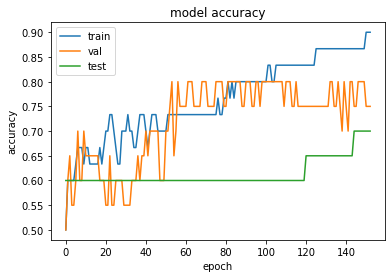

In [35]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(train_acc_list)
plt.plot(valid_acc_list)
plt.plot(test_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','test'], loc='upper left')
plt.show()